In [1]:
import botometer
import pandas as pd
import AI as ai
from decouple import config
import time


compare user of rejected post to result of AI

In [32]:
data=pd.read_json('./output.json')
data1=pd.read_json('./campaign_link.json')
data3 = pd.merge(data, data1,  left_on="username", right_on="idUser")
d= data1.groupby('idUser').size().reset_index(name='count')
d = d.rename(columns={'count': 'count_rejected'})
data3 = pd.merge(data3, d,  left_on="idUser", right_on="idUser")
data3=data3.drop_duplicates(subset=['username'],keep='last')
data3=data3.drop(["_id","idUser","status"],axis=1)

In [91]:
data3.to_json("./rejected.json")

In [33]:
data3["result"].value_counts()

human                                                    23
[{'code': 50, 'message': 'User not found.'}]             10
bot                                                       7
[{'code': 63, 'message': 'User has been suspended.'}]     7
Name: result, dtype: int64

compare user of accepted posts to AI

In [36]:
data4=pd.read_json('./output.json')
data5=pd.read_json('./campaign_link_accepted.json')
data5['type']="accepted"
data6 = pd.merge(data4, data5,  left_on="username", right_on="idUser")
d= data5.groupby('idUser').size().reset_index(name='count')
d = d.rename(columns={'count': 'count_accepted'})
data6 = pd.merge(data6, d,  left_on="idUser", right_on="idUser")
data6=data6.drop_duplicates(subset=['username'],keep='last')
data6=data6.drop(["_id","idUser","status"],axis=1)

In [37]:
data6["result"].value_counts()

human                                                    62
[{'code': 63, 'message': 'User has been suspended.'}]    17
bot                                                      12
[{'code': 50, 'message': 'User not found.'}]              7
Name: result, dtype: int64

In [89]:
data6.to_json("./accepted.json")

In [43]:
data7=data6.drop(["oracle","result","proba","score","type","oracle"],axis=1)
dataf = pd.merge(data3, data7,  on="username")

In [44]:
dataf

,result,proba,score,username,type,oracle,count_rejected,count_accepted
0,human,0.74,3.70,samirksibi,rejected,twitter,1,16
1,human,0.64,3.20,sumant53232139,rejected,twitter,4,7
2,"[{'code': 50, 'message': 'User not found.'}]",NaN,NaN,cryptominds24,rejected,twitter,5,2
3,human,0.65,3.25,Oli1One,rejected,twitter,1,1
4,human,0.85,4.25,PASTRYGEL,rejected,twitter,3,1
5,"[{'code': 63, 'message': 'User has been suspen...",NaN,NaN,cryptoprojecton,rejected,twitter,1,2
6,"[{'code': 63, 'message': 'User has been suspen...",NaN,NaN,amorcryptos,rejected,twitter,2,2
7,"[{'code': 63, 'message': 'User has been suspen...",NaN,NaN,KhouloudSbaa,rejected,twitter,1,1
8,"[{'code': 63, 'message': 'User has been suspen...",NaN,NaN,CTestch,rejected,twitter,1,1
9,"[{'code': 50, 'message': 'User not found.'}]",NaN,NaN,abhayrathoree,rejected,twitter,1,1


In [93]:
dataf.to_json("./rejected_accepted.json")

<Axes: xlabel='count_rejected', ylabel='Count'>

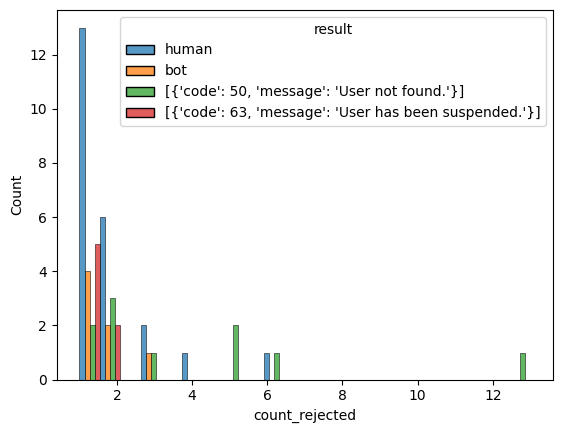

In [59]:
import seaborn as sns

sns.histplot(x = "count_rejected", hue = "result", data = data3,multiple = "dodge")

<Axes: xlabel='count_accepted', ylabel='Count'>

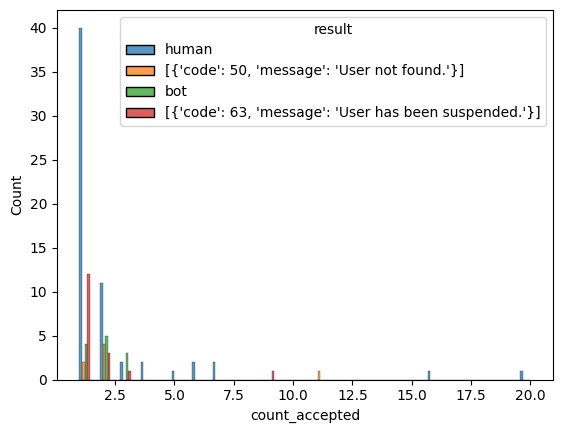

In [60]:

sns.histplot(x = "count_accepted", hue = "result", data = data6,multiple = "dodge")

/tmp/ipykernel_46100/1745065926.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = d.groupby(['result']).sum()


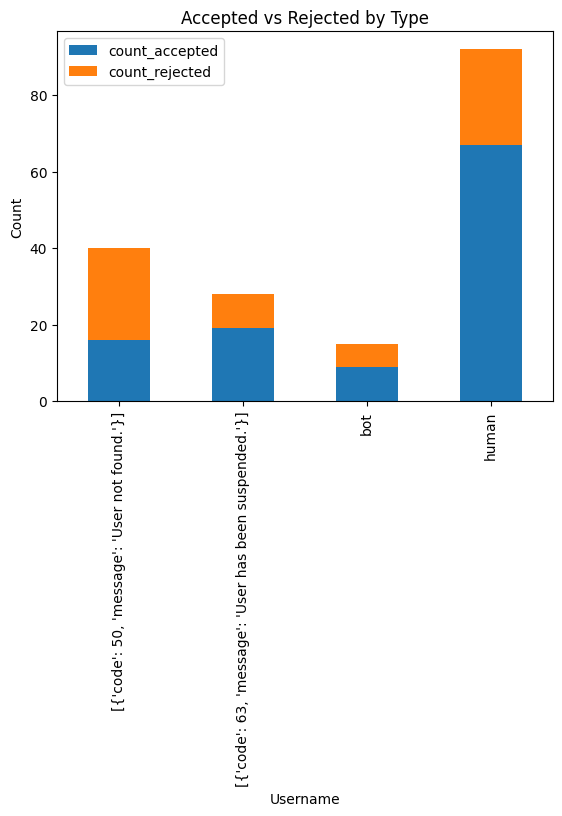

In [65]:
import matplotlib.pyplot as plt
# group the data by 'username' and 'type' columns and calculate the sum of 'count_accepted' and 'count_rejected'
d=dataf.loc[:,["username",'result','count_accepted' , 'count_rejected']]
grouped = d.groupby(['result']).sum()

# create a stacked bar chart
grouped.plot(kind='bar', stacked=True)

# set the labels for the chart
plt.xlabel('Username')
plt.ylabel('Count')
plt.title('Accepted vs Rejected by Type')

# display the chart
plt.show()

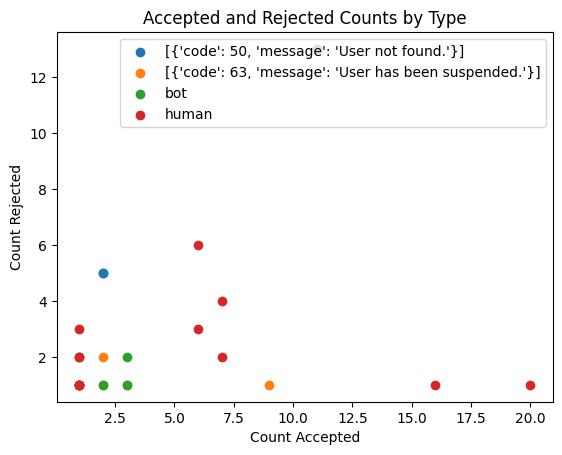

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for t, group in dataf.groupby('result'):
    
    ax.scatter(group['count_accepted'], group['count_rejected'],label=t)

# set the labels for the chart
plt.xlabel('Count Accepted')
plt.ylabel('Count Rejected')
plt.title('Accepted and Rejected Counts by Type')

# add a legend to the chart
plt.legend()

# display the chart
plt.show()

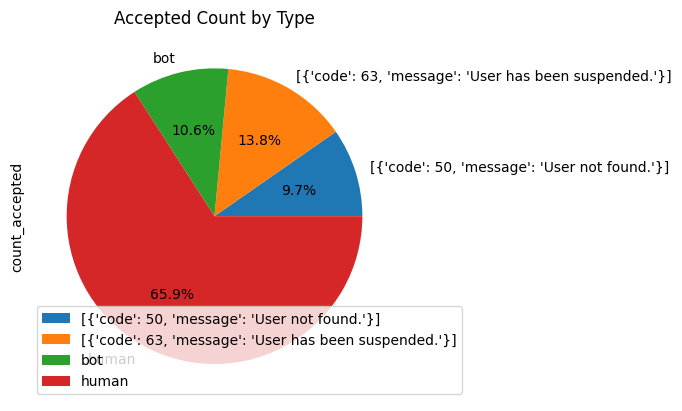

In [85]:


# group the data by type and sum the count_accepted column
grouped = data6.groupby('result').agg({'count_accepted': 'sum'})

# create a pie chart
ax = grouped.plot.pie(y='count_accepted', autopct='%1.1f%%')

# set the title for the chart
plt.title('Accepted Count by Type')

# display the chart
plt.show()

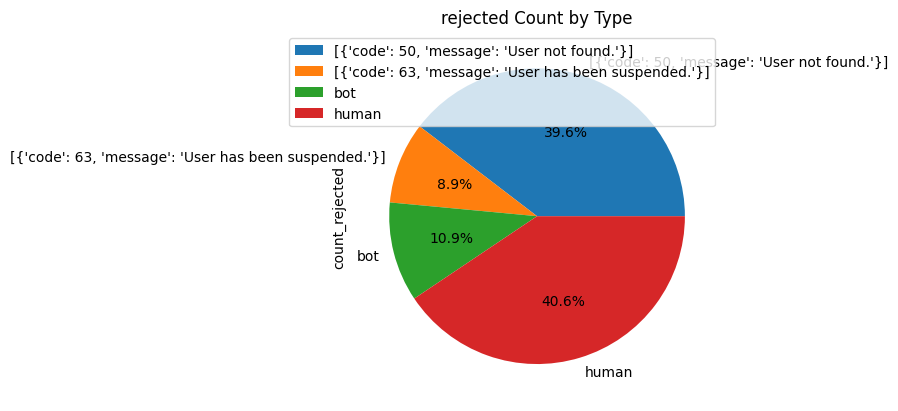

In [86]:


# group the data by type and sum the count_accepted column
grouped = data3.groupby('result').agg({'count_rejected': 'sum'})

# create a pie chart
ax = grouped.plot.pie(y='count_rejected', autopct='%1.1f%%')

# set the title for the chart
plt.title('rejected Count by Type')

# display the chart
plt.show()

human but rejected = scamers
ne va pas etre utiliser dans ai jusqu'en collecte plus de donnes